## Squamous cell carcinoma tumor inhibition by Capomulin in mice
* Mice receiving Capomulin showed a 19.5% (+/- 1.22%) reduction of overall tumor volume compared with a 51.3% (+/- 1.35%) increase in placebo.
* Capomulin reduced the number of metastatic sites when compared with placebo (p = 9.66 e-05) 
* Capomulin increased survival rates in mice over a 45-day trial in comparison with a placebo (84% vs 44%).
* Infubinol and Ketapril showed no significant effect on tumor volume.
* Infubinol showed a small but significant reduction in number of metastatic sites over 45 days (p = 0.0156), but had the worst survival rate (36% survived the trial).
* These data suggest that Capomulin is worth further investigation for the treatment of squamous cell carcinoma. 

In [157]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
from operator import itemgetter
from scipy import stats
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_file = "data/mouse_drug_data.csv"
clinical_file = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
df_mouse = pd.read_csv(mouse_file, encoding="utf-8")
df_clinic = pd.read_csv(clinical_file, encoding='utf-8')

# Combine the data into a single dataset
df_data = pd.merge(df_mouse, df_clinic, on='Mouse ID')

# Display the data table for preview
#g989 seems to have been involved in testing for two different drugs unlike the others

test_drugs = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
df_data_drugs = df_data.loc[df_data['Drug'].isin(test_drugs), :]
df_data_drugs.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
393,q119,Ketapril,0,45.000000,0
394,q119,Ketapril,5,47.864440,0
395,q119,Ketapril,10,51.236606,0
396,n923,Ketapril,0,45.000000,0
397,n923,Ketapril,5,45.824881,0


## Tumor Response to Treatment

In [148]:
# Group the data by Drug and Timepoint
df_data_dt = df_data_drugs.groupby(['Drug','Timepoint'])
# then find mean and standard error
means = df_data_dt['Tumor Volume (mm3)'].mean()
errors = df_data_dt['Tumor Volume (mm3)'].sem()
#Then create dataframes for plotting
df_means = means.unstack().transpose()
df_errors = errors.unstack().transpose()

df_means

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417
25,39.939528,55.715252,57.678982,57.482574
30,38.769339,58.299397,60.994507,59.809063
35,37.816839,60.742461,63.371686,62.420615
40,36.958001,63.162824,66.068580,65.052675


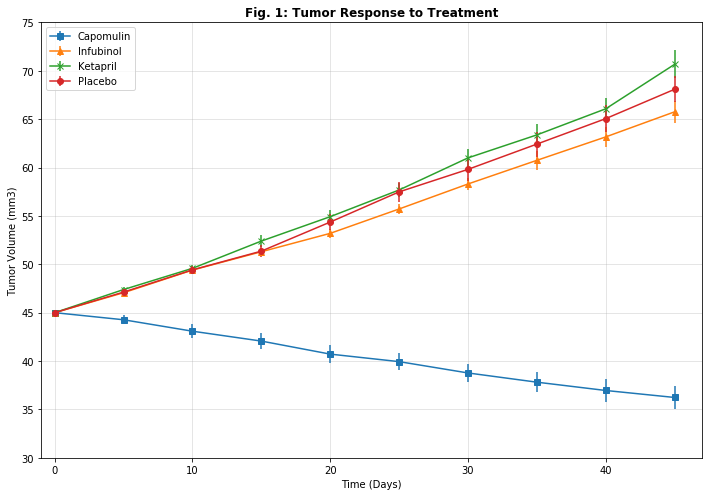

In [217]:
# Generate the Plot (with Error Bars)

x = itertools.cycle(['s', '^', 'x', 'o']) 
y = len(df_means.columns)

for i in range(0,y):
    chart = df_means.iloc[:, i].plot(yerr=df_errors, kind='line', figsize=(10,7), marker=next(x))
chart.set_title('Fig. 1: Tumor Response to Treatment', fontsize=12, fontweight="bold")
chart.set_xlabel('Time (Days)')
chart.set_ylabel('Tumor Volume (mm3)')
chart.legend(loc='best')
plt.xlim(-1,47)
plt.ylim(30, 75)
plt.tight_layout()
plt.grid(alpha=0.4)
# Save the Figure
plt.savefig('tumor_response.png')
# Show the Figure
plt.show()

In [158]:
##Fig 1. Groups of 25 mice were treated with one of three test drugs: Capomulin (blue square), Infubinol (orange diamond), Katapril (green x) or placebo (red dot).
# Mice given Capomulin showed a 19.5% reduction in tumor volume (mean) over the trial, compared with a 51.3% increase in the placebo group.


In [218]:
# Compare capomulin tumor data to placebo to check for statistical significance
capomulin = df_data_drugs.loc[(df_data_drugs['Drug']=='Capomulin'),:]
capomulin45 = capomulin.loc[capomulin['Timepoint']==45,:]

placebo = df_data_drugs.loc[(df_data_drugs['Drug']=='Placebo'),:]
placebo45 = placebo.loc[placebo['Timepoint']==45,:]

infubinol = df_data_drugs.loc[(df_data_drugs['Drug']=='Infubinol'),:]
infubinol45 = infubinol.loc[infubinol['Timepoint']==45,:]


In [219]:
##  Run a t-test to check the significance of tumor volume changes between Capomulin and Placebo
(t_stat, p) = stats.ttest_ind(capomulin45['Tumor Volume (mm3)'], placebo45['Tumor Volume (mm3)'], equal_var=False) 
cap_mean = capomulin45['Tumor Volume (mm3)'].mean()
pl_mean = placebo45['Tumor Volume (mm3)'].mean()
print("The mean tumor volume with Capomulin at day 45 is {0:.2f}".format(cap_mean))
print("The mean tumor volume with placebo at day 45 is {0:.2f}".format(pl_mean))

print("The p value for Capomulin is {0:.2e}".format(p))

if p < 0.05:
    print("The difference in sample means for Capomulin is significant.")
else:
    print("The difference in sample means for Capomulin is not significant.")

    ##  Run a t-test to check the significance of tumor volume changes between Infubinol and Placebo
(t_stat, p) = stats.ttest_ind(infubinol45['Tumor Volume (mm3)'], placebo45['Tumor Volume (mm3)'], equal_var=False) 

print("The p value for Infubinol is {0:.2f}".format(p))
if p < 0.05:
    print("The difference in sample means for Infubinol is significant.")
else:
    print("The difference in sample means for Infubinol is not significant.")

The mean tumor volume with Capomulin at day 45 is 36.24
The mean tumor volume with placebo at day 45 is 68.08
The p value for Capomulin is 1.93e-15
The difference in sample means for Capomulin is significant.
The p value for Infubinol is 0.21
The difference in sample means for Infubinol is not significant.


In [183]:
##Capomulin shows significant reduction in tumor volume over 45 day treatment compared to placebo
# Capomulin showed a marked reduction in tumor volume compared with placebo, with a p value of 1.93e-15.
# Infubinol showed no significant reduction in tumor volume compared with placebo (p = 0.2)

## Metastatic Response to Treatment

In [220]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
#Then create dataframes for plotting
mms_means = df_data_dt['Metastatic Sites'].mean().unstack().transpose()
mms_errors = df_data_dt['Metastatic Sites'].sem().unstack().transpose()

mms_means

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316
25,0.818182,1.277778,1.631579,1.941176
30,1.090909,1.588235,2.055556,2.266667
35,1.181818,1.666667,2.294118,2.642857
40,1.380952,2.100000,2.733333,3.166667


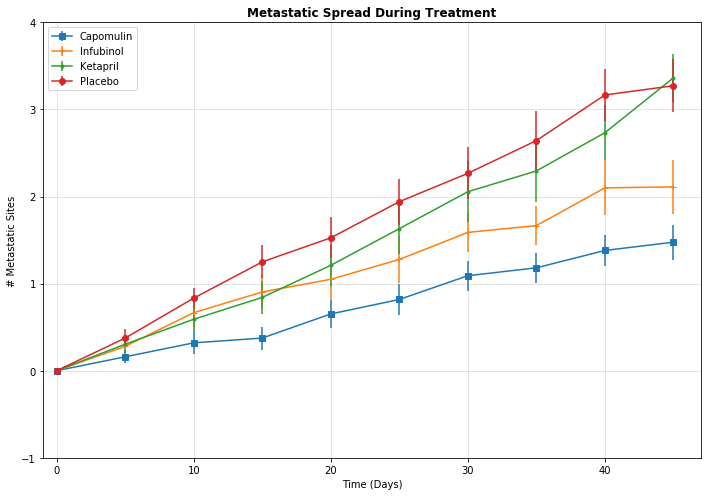

In [221]:
# Generate the Plot (with Error Bars)
x = itertools.cycle(['s', '+', '.', 'o', '*', 'v','x','<','>','-']) 
y = len(df_means.columns)

for i in range(0,y):
    chart = mms_means.iloc[:, i].plot(yerr=mms_errors, kind='line', figsize=(10,7), marker=next(x))
chart.set_title('Metastatic Spread During Treatment', fontsize=12, fontweight="bold")
chart.set_xlabel('Time (Days)')
chart.set_ylabel('# Metastatic Sites')
chart.legend(loc='best')
plt.tight_layout()
plt.grid(alpha=0.4)
plt.xlim(-1,47)
plt.ylim(-1, 4)
# Save the Figure
plt.savefig('metastatic_response.png')
# Show the Figure
plt.show()

In [184]:
#  Run a t-test
(t_stat, p) = stats.ttest_ind(capomulin45['Metastatic Sites'], placebo45['Metastatic Sites'], equal_var=False) 
cap_mean = capomulin45['Metastatic Sites'].mean()
pl_mean = placebo45['Metastatic Sites'].mean()
print(f"The mean number of metastatic sites with Capomulin at day 45 is {cap_mean}.".format('{:.2f}'))
print(f"The mean number of metastatic sites with placebo at day 45 is {pl_mean}.")

print(f"The p value is {p}.")

if p < 0.05:
    print("The difference in sample means is significant.")
else:
    print("The difference in sample means is not significant.")
    
(t_stat, p) = stats.ttest_ind(infubinol45['Metastatic Sites'], placebo45['Metastatic Sites'], equal_var=False) 
inf_mean = infubinol45['Metastatic Sites'].mean()

print(f"The mean number of metastatic sites with Infubinol at day 45 is {cap_mean}.".format('{:.2f}'))

print(f"The p value for Infubinol is {p}.")

if p < 0.05:
    print("The difference in sample means for Infubinol is significant.")
else:
    print("The difference in sample means for Infubinol is not significant.")

The mean number of metastatic sites with Capomulin at day 45 is 1.4761904761904763.
The mean number of metastatic sites with placebo at day 45 is 3.272727272727273.
The p value is 9.6567729846605e-05.
The difference in sample means is significant.
The mean number of metastatic sites with Infubinol at day 45 is 1.4761904761904763.
The p value for Infubinol is 0.015522524391760767.
The difference in sample means for Infubinol is significant.


## Survival Rates

In [222]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival = df_data_dt['Mouse ID'].count().unstack().transpose()
# Calculate the percentage survived over time, referencing the first row as starting population
# 
zeros = survival.iloc[0]
for i in range(0,len(survival)):
    survival.iloc[i] = survival.iloc[i].divide(zeros).multiply(100)
survival

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100.0,100.0,100.0,100.0
5,100.0,100.0,92.0,96.0
10,100.0,84.0,88.0,96.0
15,96.0,84.0,76.0,80.0
20,92.0,80.0,76.0,76.0
25,88.0,72.0,76.0,68.0
30,88.0,68.0,72.0,60.0
35,88.0,48.0,68.0,56.0
40,84.0,40.0,60.0,48.0


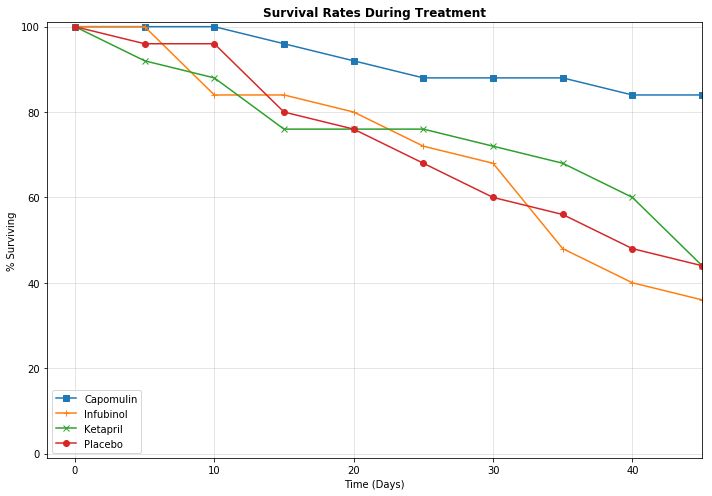

In [225]:
# Generate the Plot - selecting markers from a list
x = itertools.cycle(['s', '+', 'x', 'o']) 
y = len(survival.columns)

for i in range(0,y):
    chart = survival.iloc[:, i].plot(kind='line', figsize=(10,7), marker=next(x))
chart.set_title('Survival Rates During Treatment', fontsize=12, fontweight="bold")
chart.set_xlabel('Time (Days)')
chart.set_ylabel('% Surviving')
chart.legend(loc='best')
plt.tight_layout()
plt.grid(alpha=0.4)
plt.xlim(-2, 45)
plt.ylim(-1, 101)
# Save the Figure
plt.savefig('survival_rates.png')

# Show the Figure
plt.show()

In [226]:
##Capomulin-treated mice showed increased rates of survival over 45-days compared with placebo. Ketapril, Infubinol, did not.

## Summary Bar Graph

In [233]:
# Calculate the percent changes for each drug

pct_change = df_means.iloc[9].subtract(df_means.iloc[0])/df_means.iloc[0]*100

# Note: Percent change = (End Value - Start Value) ÷ Start Value*100

# Display the data to confirm
tumor_delta = pd.DataFrame({'Change':pct_change.values,
                           'Error':df_errors.iloc[9]})

tumor_delta = tumor_delta.sort_values('Change')
tumor_delta.reset_index(drop=True)
tumor_delta


,Change,Error
Drug,,
Capomulin,-19.475303,1.223977
Infubinol,46.123472,1.144427
Placebo,51.297960,1.351726
Ketapril,57.028795,1.453186


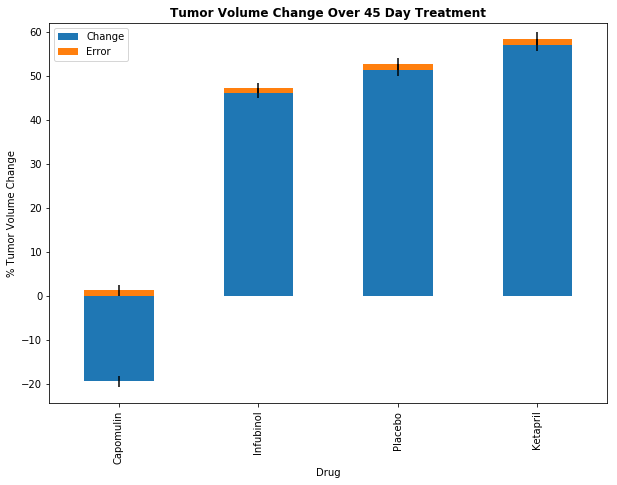

<Figure size 432x288 with 0 Axes>

In [245]:
colors = {'-':'#00BEC5'}
chart = tumor_delta.plot(yerr=tumor_delta['Error'], kind='bar', figsize=(10,7), stacked=True)


# Save the Figure
# Set the y limits of the current chart
plt.ylim(tumor_delta['Change'].min()-5, tumor_delta['Change'].max() + 5) 
plt.title("Tumor Volume Change Over 45 Day Treatment", fontsize=12, fontweight="bold")
plt.ylabel("% Tumor Volume Change")
#plt.text(x=tumor_delta.index, y=tumor_delta['Change'],s=str(np.round(tumor_delta['Change'])) + '%', va='center', ha='center')

# Show the Figure
plt.show()
plt.savefig('Tumor Volume change.png')

In [12]:
#NOTE: Need to figure out either how to change colors of the placebo/neg values, or go with the Tuple option

In [ ]:
## Need to fix formatting on t-test